# The Wonderful World of Coffee
### Business Understanding
This notebook explores a coffee dataset that has been scraped by a reddit user from the Coffee Quality
Institute's website and uploaded onto GitHub.  Our idea behind researching this dataset is to identify where the top
coffee brands come from, and what attributes go into the production of that coffee that makes it so desirable?
Can a model be built targeting those ranges of successful coffee producers in order to predict ratings for 
their future brands?  These are some of the questions we will investigate in our first project.

The data source for our dataset:

https://github.com/jldbc/coffee-quality-database

### Data Description (Meaning/Type/Quality)
Lets import our libraries and data. 


In [1]:
#Add library references
import pandas as pd
import numpy as np
import seaborn as sns
#import plotly.plotly as py
#import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#Upload Data
df_ar = pd.read_csv('https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/arabica_data_cleaned.csv',
                    sep=',', header=0) # read in the arabicaica data
df_rob = pd.read_csv('https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/robusta_data_cleaned.csv',
                     sep=',', header=0) # read in the Robusta data
#Column rename to match for merging
df_ar.rename(columns={'Unnamed: 0':'Id'}, inplace=True)
df_rob.rename(columns={'Unnamed: 0':'Id',
                       'Bitter...Sweet':'Sweetness',
                       'Uniform.Cup':'Uniformity',
                       'Salt...Acid':'Acidity',
                       'Fragrance...Aroma':'Aroma'}, inplace=True)


## Data meaning

Below is a list of continuous and categorical measures:
* Category - Description - Range
#### Continuous (Quality) Measures
* Aroma - Smell of the coffee - 1:10
* Flavor - Taste of the coffee - 1:10
* Aftertaste - Residual flavor - 1:10
* Acidity - Acidity of the coffee - 1:10
* Body - How does the coffee feel? - 1:10
* Balance - Flavor/Aroma Balance - 1:10
* Uniformity - Cup to Cup Differences - 1:10
* Cup Cleanliness - How clean is the flavor? 1:10
* Sweetness - Level of sweetness - 1:10
* Moisture - How dry is the flavor? - 1:10
* Defects - Count of any defects - 0:63
* Cupper Points - Overall Rating 1:10
* Total Cup Points - Total Cup Rating - 1:100

#### Categorical (Bean) Measures
* Processing Method - How was the bean processed?
* Color - What is its color?
* Species (arabica / robusta)

#### Categorical (Farm) Measures
* Owner
* Country of Origin
* Farm Name
* Lot Number
* Mill
* Company
* Altitude
* Region

Since the data came to us in two CSV's of arabica and robusta, lets combine the two datasets to begin our analysis.  First we'll need to remove 
a few columns and merge the two dataframes.

In [3]:

#dropping columns we won't use
df_rob = df_rob.drop(['Lot.Number', 'altitude_low_meters', 'altitude_high_meters', 'Certification.Contact',
                      'Certification.Contact', 'Expiration', 'Certification.Body', 'ICO.Number',
                      'Certification.Address','Mouthfeel', 'Id'], axis=1)
df_ar = df_ar.drop(['Lot.Number', 'altitude_low_meters', 'altitude_high_meters', 'Certification.Contact',
                      'Certification.Contact', 'Expiration', 'Certification.Body', 'ICO.Number',
                      'Certification.Address', 'Id'], axis=1)

df_comb = df_ar.append(df_rob)


C:\Users\andyh\Anaconda3\envs\miner\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


### Data Quality & Simple Statistics
Now that our dataframes are combined, lets analyze counts of missing values and simple statistics.
#### Missing Values

In [4]:
print("Structure of data:\n",df_comb.shape,"\n")
print("Count of missing values:\n",df_comb.isnull().sum().sort_values(ascending=False),"\n")

Structure of data:
 (1339, 35) 

Count of missing values:
 Farm.Name               359
Mill                    318
Producer                232
altitude_mean_meters    230
Variety                 226
Altitude                226
Color                   218
Company                 209
Processing.Method       170
Region                   59
Harvest.Year             47
Body                     28
Owner.1                   7
Owner                     7
Quakers                   1
Country.of.Origin         1
Balance                   0
Category.One.Defects      0
Bag.Weight                0
Category.Two.Defects      0
Clean.Cup                 0
Aroma                     0
Aftertaste                0
unit_of_measurement       0
Cupper.Points             0
Flavor                    0
Grading.Date              0
In.Country.Partner        0
Moisture                  0
Number.of.Bags            0
Species                   0
Sweetness                 0
Total.Cup.Points          0
Uniformity       

The majority of missing values center around farm name, mill, producer, altitude, company.  At this stage, we need
to decide what categorical values we can keep for our analysis.  Country/region might be one
of the better attributes to start an analysis due to its low missing value count.   Categorical classification might 
not be as successful with farm name, color and processing method as they are missing quite a few values.  We won't 
target those for analysis. We believe that alot of those categorical missing values are because the companies surveyed 
didn't have the available information or didn't fill out their survey completely.  The continuous data has very low NA 
counts which means any regression, will likely fair well.


One area we think influences coffee production is altitude_mean_meters.  To clean that column, we'll be be 
replacing blank and altitude means of 1 because we believe them to be a data entry error.  We also removed a row that 
didn't have a country of origin. 


In [4]:
#Changing datatypes
conv_dict = {'Species': str,
                'Owner': str,
                'Mill': str,
                'Company': str,
                'Region': str,
                'Producer': str,
                'Variety': str
                }
df_comb = df_comb.astype(conv_dict)

#Outlier Removal altitude
df_comb = df_comb.replace({'altitude_mean_meters': {1: df_comb['altitude_mean_meters'].mean()}})
df_comb.loc[[896,1040,1144,543],'altitude_mean_meters'] = np.nan
df_comb['altitude_mean_meters'].fillna((df_comb['altitude_mean_meters'].mean()),inplace=True)
df_comb = df_comb[df_comb["Body"]>1]  #remove row with 0 ratings 
#nan removal from country
df_comb = df_comb.drop(df_comb.index[1197])
#removal of Clean.Cup Outlier
df_comb = df_comb[df_comb['Clean.Cup']>0] 
#second check of missing values to ensure integrity. 
print("Count of missing values:\n",df_comb.isnull().sum().sort_values(ascending=False),"\n")



Count of missing values:
 Farm.Name               355
Altitude                222
Color                   215
Processing.Method       150
Harvest.Year             46
Owner.1                   7
Quakers                   1
Bag.Weight                0
Balance                   0
Body                      0
Flavor                    0
Aroma                     0
Category.Two.Defects      0
Clean.Cup                 0
Aftertaste                0
Company                   0
Country.of.Origin         0
Cupper.Points             0
Category.One.Defects      0
unit_of_measurement       0
Grading.Date              0
altitude_mean_meters      0
In.Country.Partner        0
Mill                      0
Moisture                  0
Number.of.Bags            0
Owner                     0
Producer                  0
Region                    0
Species                   0
Sweetness                 0
Total.Cup.Points          0
Uniformity                0
Variety                   0
Acidity               

### Simple Statistics
As any good Data Scientist, we first must check our data ranges, means, max's, mins, and quartiles, to see where
the data sits.  This is an important step because it allows another view of possible faulty or outlier data within our
dataset. Most of our continuous variables range from 1:10 for the coffee property ratings and have no missing values.
One noticeable trait is many of the continuous attribute means are fairly similar, which may lead to some clustering or 
correlation down the road.  Something to keep in mind as we explore the data.

In [18]:
#Simple Stats
# print(df_comb.head().append(df_comb.tail()), "\n")
print("Summary Statistic's:\n",round(df_comb.describe(),2),"\n")


Summary Statistic's:
        Acidity  Aftertaste    Aroma  Balance     Body  Category.One.Defects  \
count  1308.00     1308.00  1308.00  1308.00  1308.00               1308.00   
mean      7.54        7.40     7.57     7.52     7.52                  0.43   
std       0.32        0.35     0.31     0.35     0.29                  1.83   
min       5.25        6.17     5.08     6.08     5.25                  0.00   
25%       7.33        7.25     7.42     7.33     7.33                  0.00   
50%       7.50        7.42     7.58     7.50     7.50                  0.00   
75%       7.75        7.58     7.75     7.75     7.67                  0.00   
max       8.75        8.67     8.75     8.75     8.58                 31.00   

       Category.Two.Defects  Clean.Cup  Cupper.Points   Flavor  Moisture  \
count               1308.00    1308.00        1308.00  1308.00   1308.00   
mean                   3.58       9.85           7.50     7.52      0.09   
std                    5.34       0.67

### Visualize Attributes -LAST DAVID COPY SPOT
Now that we've got our data organized and a little cleaner, lets begin visualizing our data. We'll start with a 
bar chart of the Number of coffee samples by Country.  


Text(0.5, 1.0, 'Number of Coffee Samples by Country')

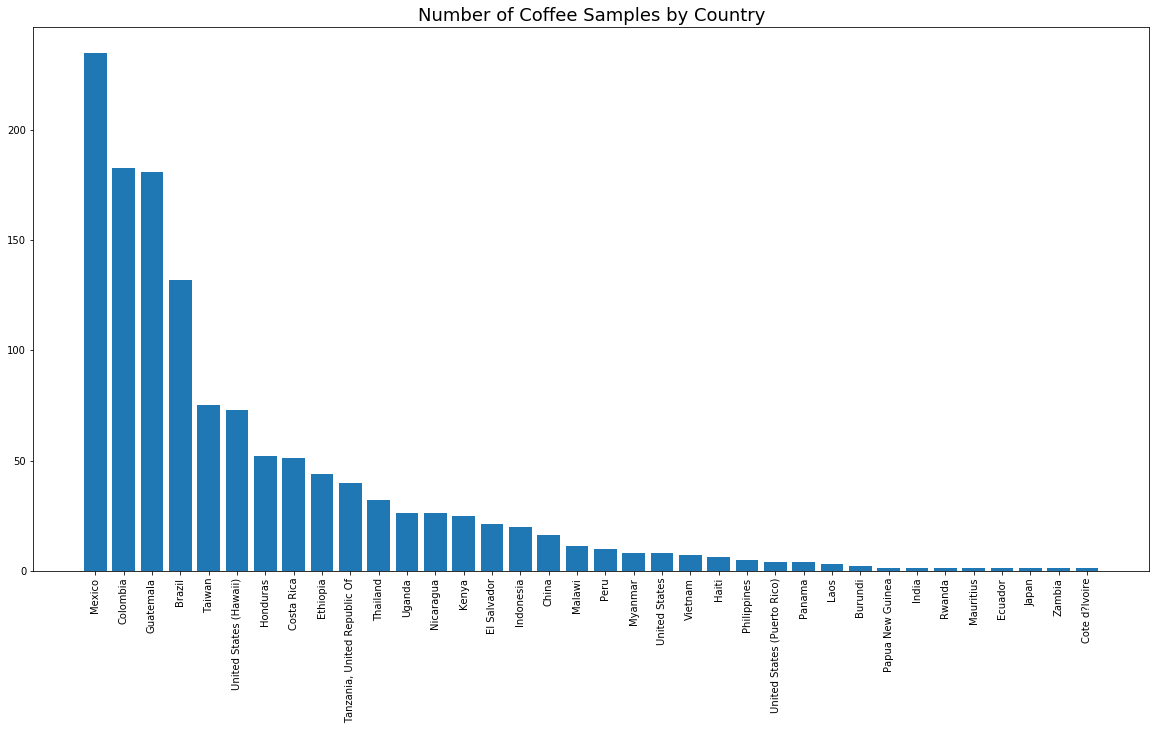

In [5]:
counts = df_comb['Country.of.Origin'].value_counts().to_dict()
min_count = min(counts.values())
max_count = max(counts.values())

#Bar graph of number of coffee samples per country, top 50
counts_top50 = dict(list(counts.items())[int(len(counts)/2):])
plt.figure(figsize=(20,10))
plt.bar(range(len(counts)), list(counts.values()), align='center')
plt.xticks(range(len(counts)), list(counts.keys()), rotation=90)
plt.title("Number of Coffee Samples by Country", fontsize='18')

Utilizing the bar chart, we can see the range of differences between the top and bottom coffee producers.  
With Mexico coming in first, we're not surprised by those that follow it.  Columbia, Guatemala, Brazil, Taiwan are
all well known coffee producing countries and provide excellent climates for growing coffee beans.  Another interesting
side-note is that Hawaii produces 3x as many coffee varieties as the mainland US.  Gotta love those Kona Blends.


Now that we've got an idea behind who are the biggest producers, lets see what countries produce the highest rated 
coffee via the reviewers "Total Cup Score."  We'll group by country and analyze their average score.

In [6]:
#Dataframe of countries by avg Cup rating

country_lists=list(df_comb['Country.of.Origin'].unique())
country_total_cup_ratio=[]
for each in country_lists:
    country=df_comb[df_comb['Country.of.Origin']==each]
    country_total_cup_avg=round(sum(country['Total.Cup.Points'])/len(country),2)
    country_total_cup_ratio.append(country_total_cup_avg)

    
data=pd.DataFrame({'Country of Origin':country_lists,'Total Cup Avg':country_total_cup_ratio})
new_index=(data['Total Cup Avg'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)
sorted_data.head(10)


,Country of Origin,Total Cup Avg
4,United States,85.98
19,Papua New Guinea,85.75
0,Ethiopia,85.48
21,Japan,84.67
15,Kenya,84.31
10,Uganda,84.05
22,Ecuador,83.83
18,Panama,83.71
17,Colombia,83.11
20,El Salvador,83.05


Text(0.5, 1.0, 'Total coffee score by country')

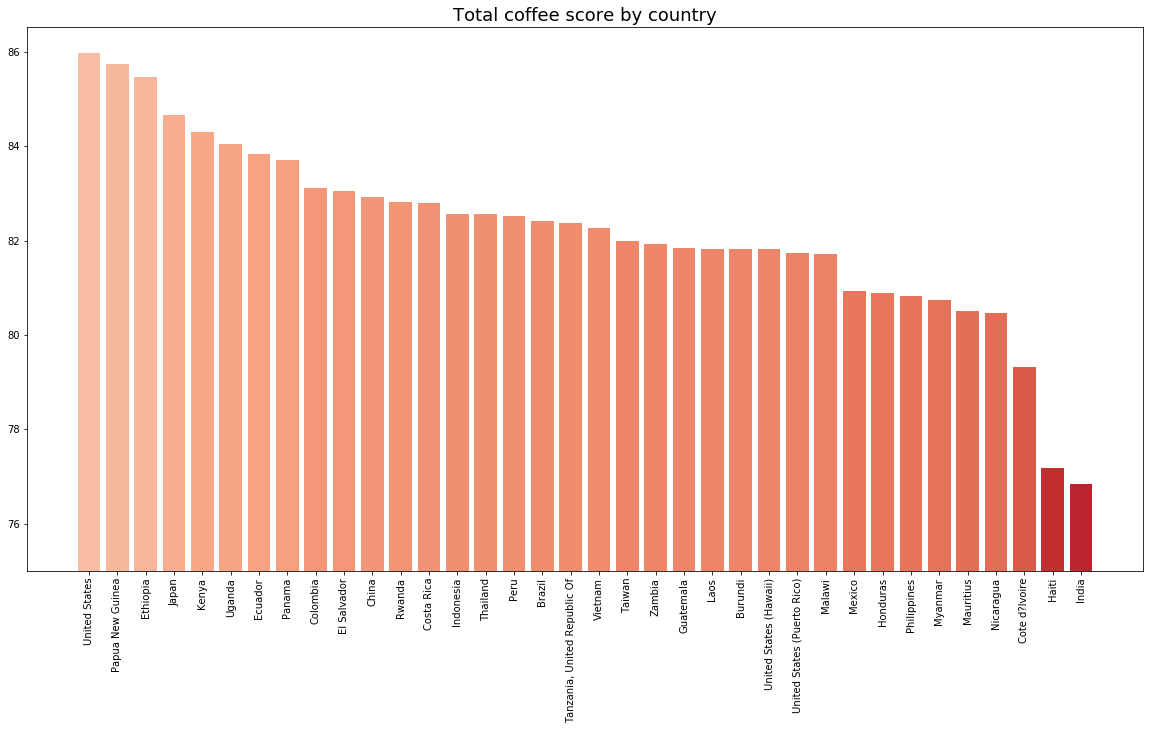

In [7]:
import matplotlib.colors
plt.figure(figsize = (20,10))
cmap = plt.cm.coolwarm_r
norm = matplotlib.colors.Normalize(vmin = 1, vmax = 30)
plt.bar(height=sorted_data['Total Cup Avg']-75,
        x = sorted_data['Country of Origin'],
        align = 'center',bottom = 75,
        color = cmap(norm(sorted_data['Total Cup Avg'].values-75)))
plt.xticks(rotation=90)
plt.title("Total coffee score by country", fontsize='18')


Here we see that quantity doest not equate to quality as many of the top producing Central American countries
are lower in terms of overall coffee rating.  It seems their business model focus's more on higher 
production than on quality.  Which makes sense as coffee's worldwide popularity grows and the more experienced 
manufacturing countries adjust to meet demand. The best rated coffee would comes from United States, 
Papua New Guinea, Ethiopia, and Japan.  


Now that we've got a few countries of interest, lets delve into the continuous variables themselves to get an 
idea behind their distributions.  So first a frequency plot of the continuous variables we initially predict to 
be relevant.  Those are Aroma, Aftertaste, Balance, Flavor, Acidity, Moisture, Cupper.Points, and Total.Cup.Points.
We'll also do a pairplot to view some scatterplots of the continuous variables, and separate them by Species.


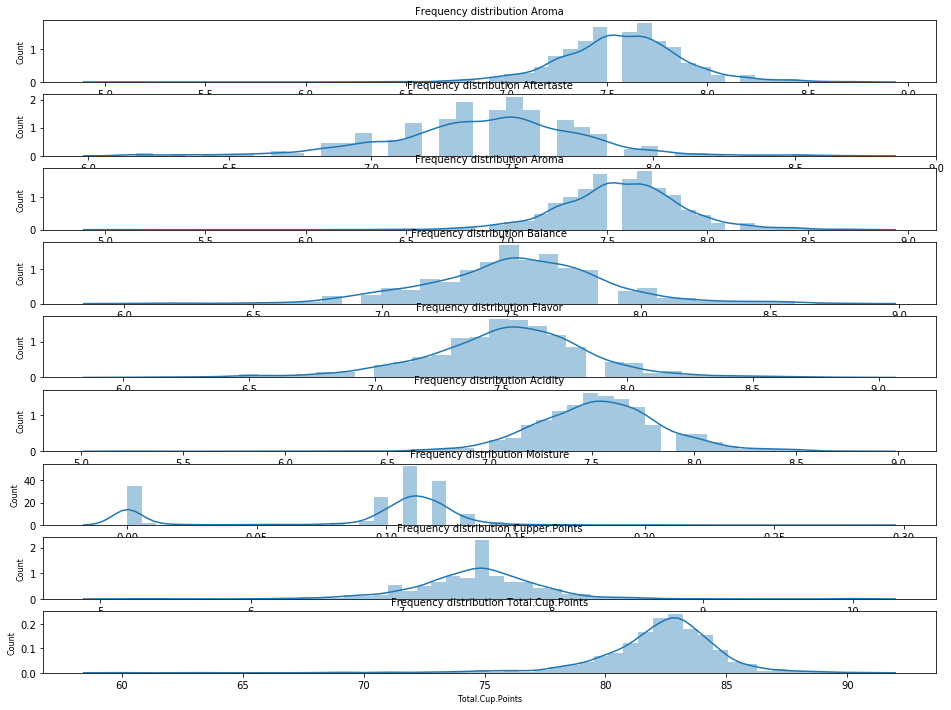

In [8]:
#Frequency plots 
col_names = ['Aroma','Aftertaste', 'Aroma','Balance', 
             'Flavor', 'Acidity','Moisture', 'Cupper.Points', 'Total.Cup.Points']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

    sns.distplot(df_comb[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

These frequency plots show a pretty good distribution of value's with some slight left skew.  There is an odd gap in a 
few of them.  Moisture has some interesting distributions with most centered around the mean or on the dry side of the
scale.  Which leads us to believe that people might prefer a dryer taste when it comes to rating their coffee.  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000238C84F9630>,
      dtype=object)

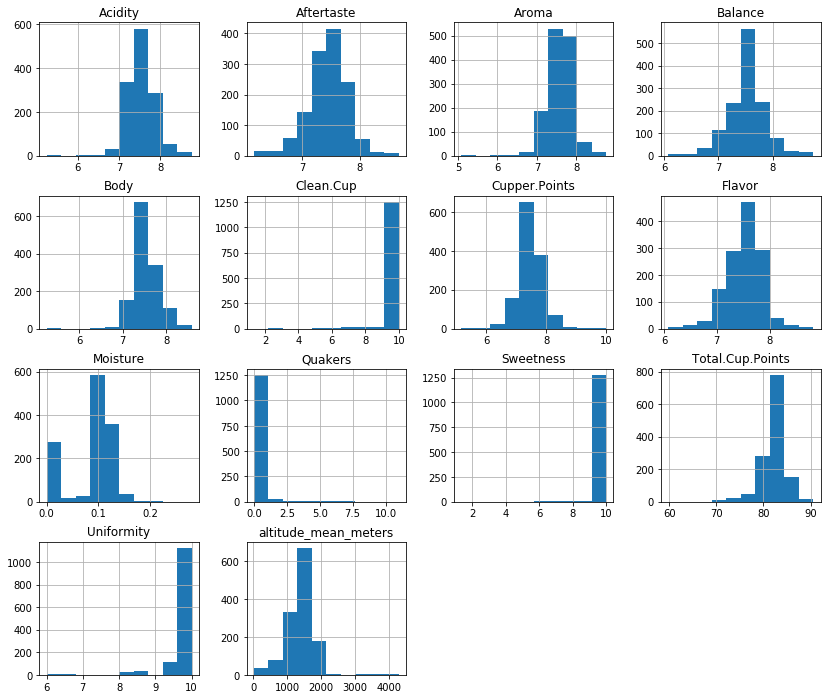

In [9]:
#Histogram charts
df_num = df_comb.select_dtypes(include=['float64'])
df_num.hist(figsize =(14,12))

Description of Histogram charts


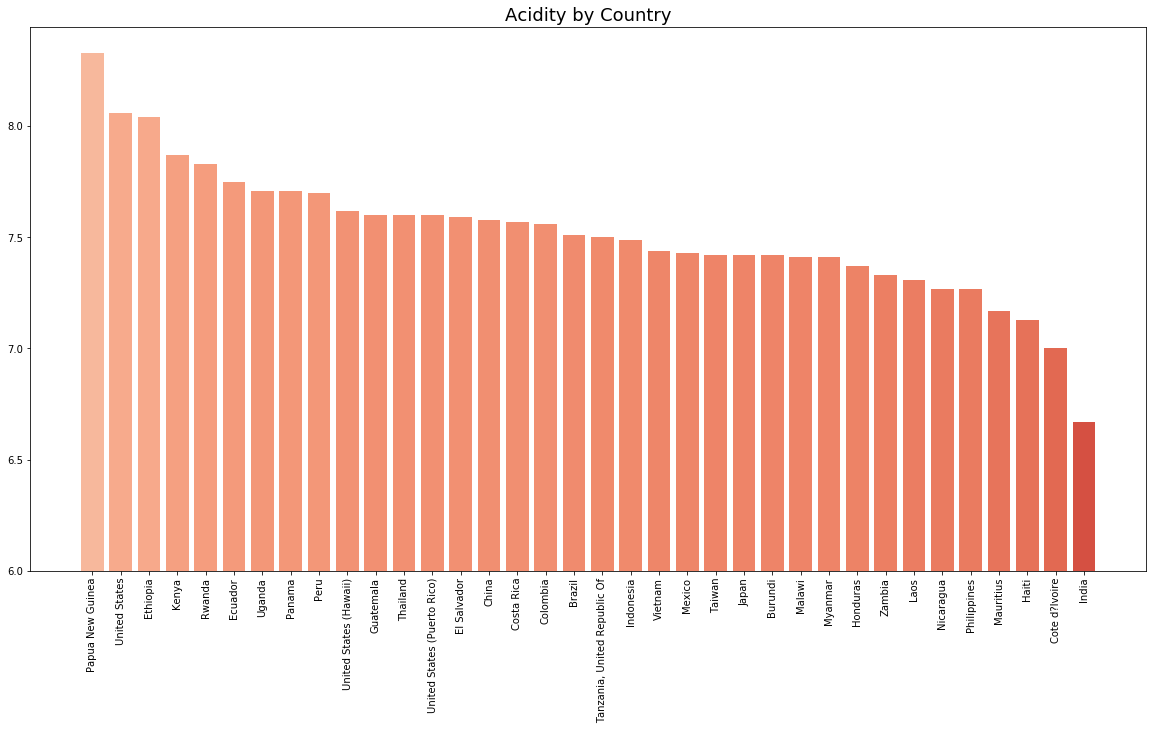

In [10]:
#Country Plotting Function by D.Josephs
def countrysorter(frame = df_comb,col='Total.Cup.Points'):
    contlist = list(frame['Country.of.Origin'].unique())
    contval = []
    for each in contlist:
        cont = frame[frame['Country.of.Origin']==each]
        contavg =  round(sum(cont[col])/len(cont),2)
        contval.append(contavg)


    dat = pd.DataFrame({'Country.of.Origin':contlist,'avgval':contval})
    nindex = (dat['avgval'].sort_values(ascending = False)).index.values
    sordat = dat.reindex(nindex)
    return(sordat)

def countryplotter(dat, sub = 0,
                   nmin = 1, nmax = 30,tit = 'TODO'):
    plt.figure(figsize = (20,10))
    cmap = plt.cm.coolwarm_r
    norm = matplotlib.colors.Normalize(vmin = nmin, vmax = nmax)
    # print(norm(dat['avgval'].values-nmin))
    plt.bar(height = dat['avgval']-sub,
            x = dat['Country.of.Origin'],
            align = 'center',
            bottom = sub,
            color = cmap(norm(dat['avgval'].values-nmin)))
    plt.xticks(rotation = 90)
    plt.title(tit,fontsize = 18)

countryplotter(dat = countrysorter(col = 'Acidity'),sub = 6,nmin = 3, nmax = 10, tit = 'Acidity by Country')

### Explore Joint Attributes


In [ ]:
# Huge pairplot matrix.  Probably need to whittle down the attributes a bit first.Example drops below
sns.pairplot(df_comb, vars = ['Aroma','Aftertaste', 'Aroma','Balance', 
             'Flavor', 'Acidity','Moisture', 'Cupper.Points', 'Total.Cup.Points'],
             hue = 'Species');

At this higher level view of the data, we begin to see clustering in the continuous
variables around the 6 to 8 rating mark.  Add to that our range for the rating scale is 1 to 10 and we begin to suspect
there may be some correlation in the dataset.  


Our next step is to look at some individual histograms and
a correlation heat map.

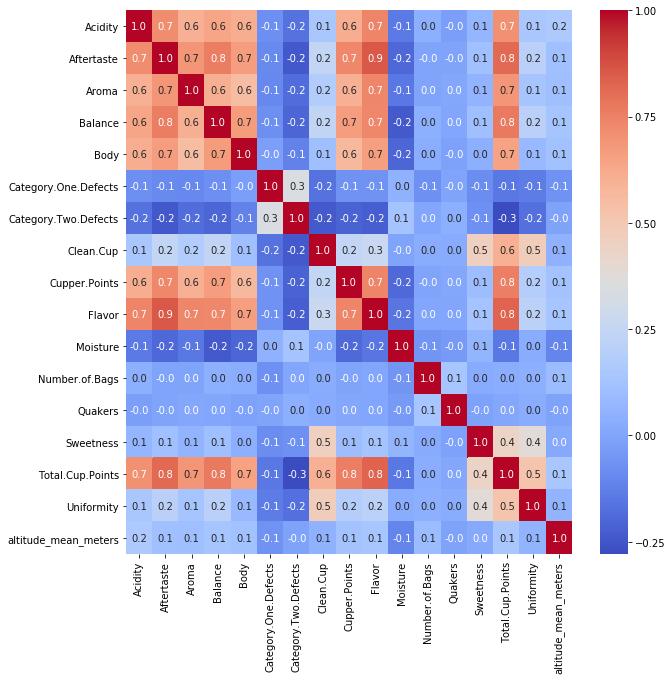

In [12]:
#Generate Correlation HeatMap
colormap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(10, 10))
corr = df_comb.corr()

sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".1f",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

There is some correlation to be concerned 

### Explore Joint attributes


In [13]:
conditions = [
    (df_comb['altitude_mean_meters'] < 1000),
    (df_comb['altitude_mean_meters'] < 2000),
    (df_comb['altitude_mean_meters'] < 3000)]
choices = ['Low', 'Mid', 'High']
df_comb['alt_category'] = np.select(conditions, choices, default='High')
print(df_comb.head(5))



   Acidity  Aftertaste       Altitude  Aroma Bag.Weight  Balance  Body  \
0     8.75        8.67      1950-2200   8.67      60 kg     8.42  8.50   
1     8.58        8.50      1950-2200   8.75      60 kg     8.42  8.42   
2     8.42        8.42  1600 - 1800 m   8.42          1     8.42  8.33   
3     8.42        8.42      1800-2200   8.17      60 kg     8.25  8.50   
4     8.50        8.25      1950-2200   8.25      60 kg     8.33  8.42   

   Category.One.Defects  Category.Two.Defects  Clean.Cup  ... Quakers  \
0                     0                     0       10.0  ...     0.0   
1                     0                     1       10.0  ...     0.0   
2                     0                     0       10.0  ...     0.0   
3                     0                     2       10.0  ...     0.0   
4                     0                     2       10.0  ...     0.0   

         Region  Species  Sweetness Total.Cup.Points  Uniformity  Variety  \
0  guji-hambela  Arabica       10.0    

C:\Users\andyh\Anaconda3\envs\miner\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


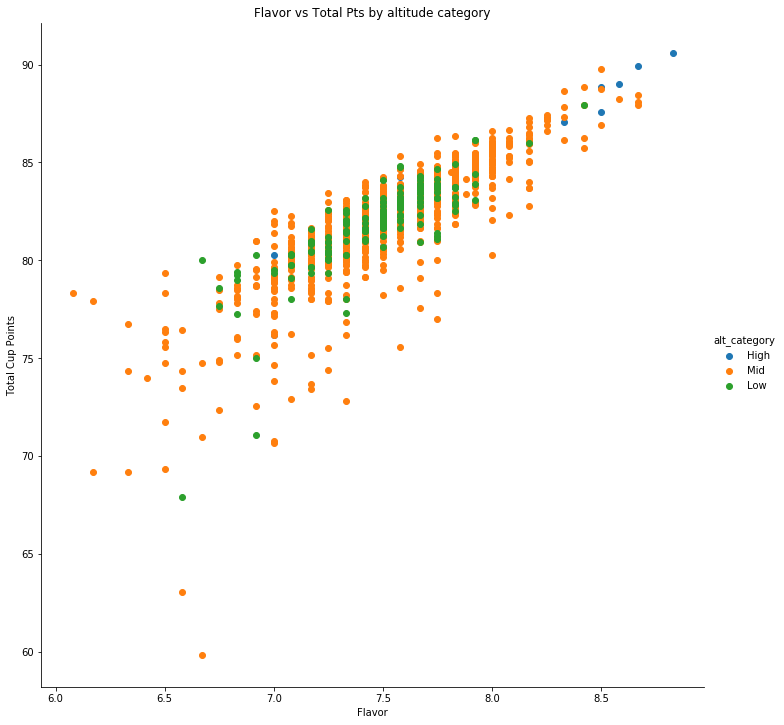

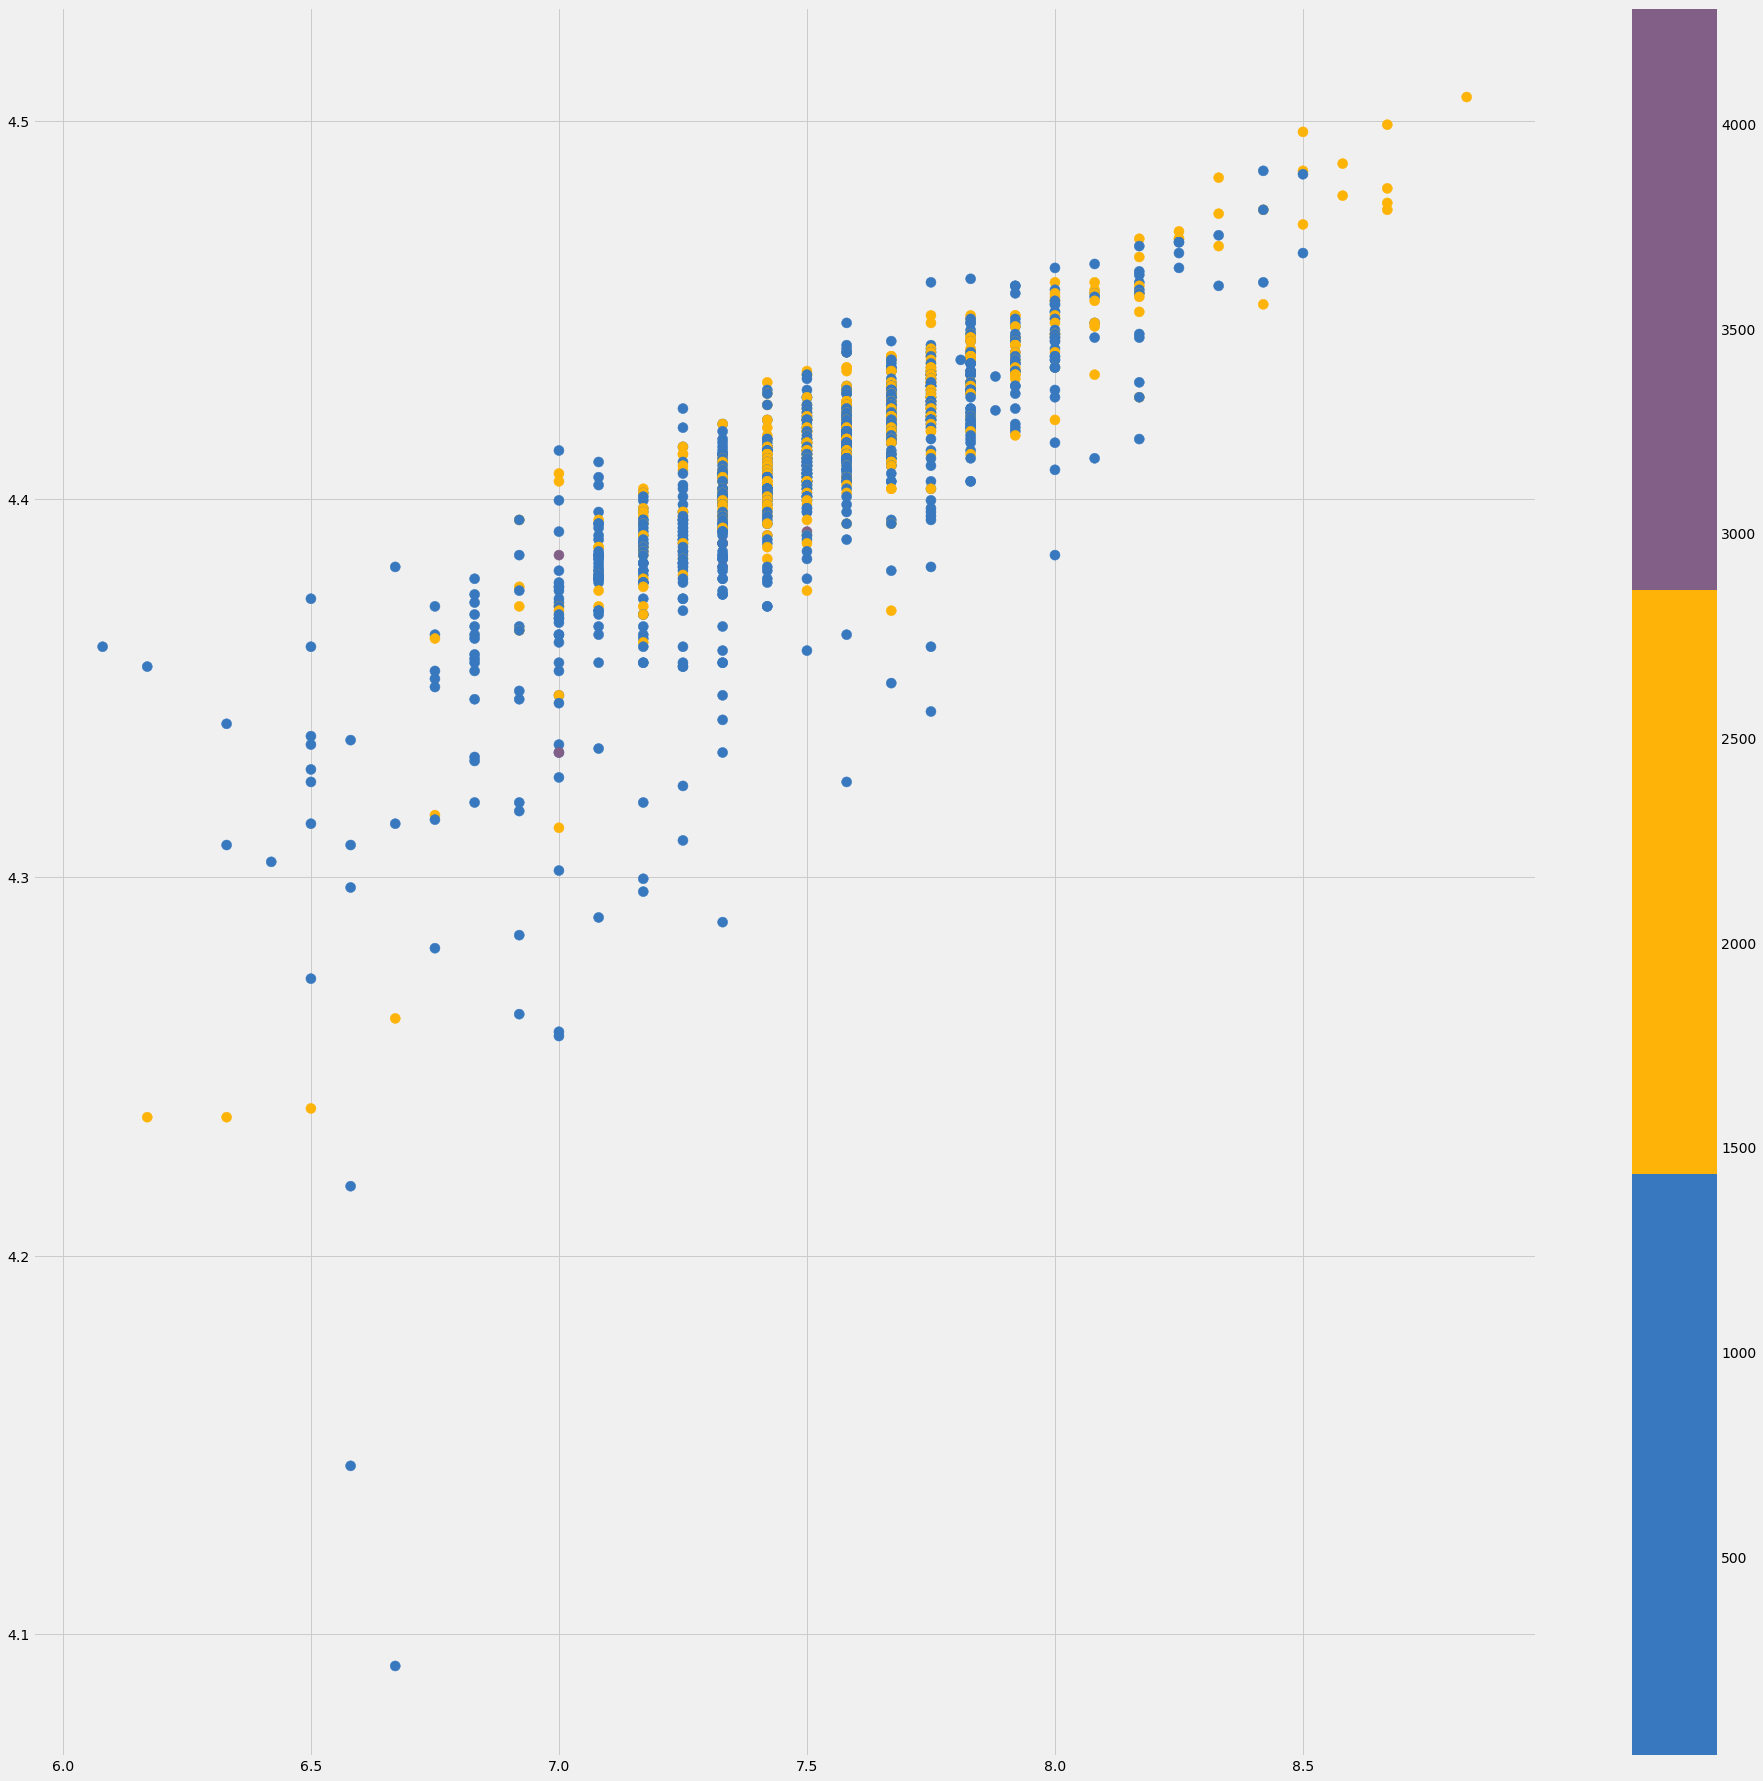

In [14]:
fuck = (sns
 .FacetGrid(df_comb, hue='alt_category', size=10)
 .map(plt.scatter, 'Flavor', 'Total.Cup.Points')
 .add_legend()
 .set(
    title='Flavor vs Total Pts by altitude category',
    xlabel='Flavor',
    ylabel='Total Cup Points'
))

#colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
colors = ["windows blue", "amber", "dusty purple"]

cmap = matplotlib.colors.ListedColormap(sns.xkcd_palette(colors).as_hex())
#cmap = matplotlib.colors.ListedColormap(sns.color_palette("RdBu_r",100).as_hex())
with plt.style.context(('fivethirtyeight')):
    f, ax  = plt.subplots(figsize = (30,30))
    pnts  =  ax.scatter((df_comb['Flavor']), y =  np.log(df_comb['Total.Cup.Points']), c = (df_comb['altitude_mean_meters']),
                        s = 100, cmap =cmap)

    f.colorbar(pnts)
